In [1]:
#PCA
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [14]:
wine = pd.read_csv('Wine.csv')
wine.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [15]:
# wine = wine.drop(columns=['Id'])

In [16]:
wine.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [17]:
x = wine.iloc[:, :-1]
y = wine.iloc[:, -1]

x_scaled = StandardScaler().fit_transform(x)

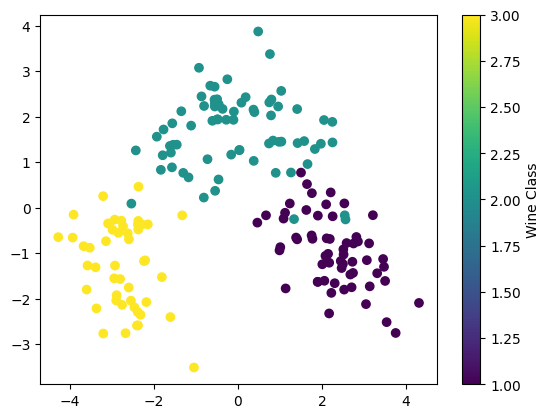

In [19]:
pca = PCA(n_components=2)
pc = pca.fit_transform(x_scaled)


plt.scatter(pc[:, 0], pc[:, 1], c=y)
plt.colorbar(label="Wine Class")

plt.show()

In [26]:
#LDA
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
iris = pd.read_csv('Iris.csv')
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [22]:
iris = iris.drop(columns=['Id'])

In [23]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [27]:
x = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_test)

In [31]:
lda = LinearDiscriminantAnalysis()
X_train = lda.fit_transform(X_train_scaled, Y_train)
x_test = lda.transform(x_test_scaled)

In [32]:
lda.fit(X_train, Y_train)
y_pred = lda.predict(x_test)

In [33]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  1.0


In [34]:
print('Classification Report: ', classification_report(y_test, y_pred))

Classification Report:                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



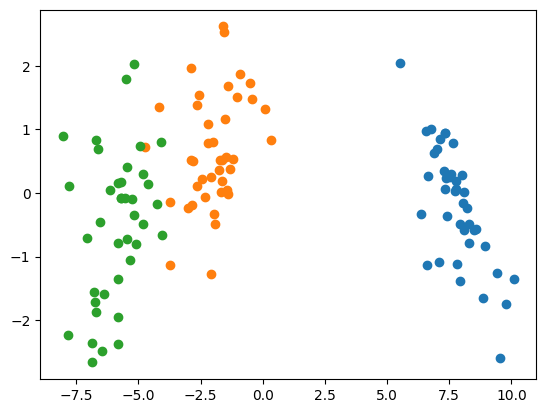

In [38]:
for species in iris['Species'].unique():
    plt.scatter(X_train[Y_train==species, 0],
                X_train[Y_train==species, 1],
                label = species)
plt.show()